In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn import preprocessing
import numpy as np
import pandas as pd

# Agrisolus
# Previsão de Pesagem

In [2]:
ag = pd.read_csv("agrisolus_ml_dias/agrisolus.csv", sep=';')

In [3]:
ag.drop('Unnamed: 0', axis=1,inplace=True)
ag.columns

Index(['Data', 'Peso', 'Umidade', 'Temperatura', 'idLote', 'idLinhagem',
       'idBalanca', 'DataAlojamento', 'Sexo', 'PesoChegada', 'DataAbate',
       'Idade', 'idPesoEsperado', 'PesoEsperado', 'DiffPeso'],
      dtype='object')

### Remove linhas que apresentem pesagem com 25% acima do esperado e 25% abaixo do esperado (Pesagem parcial ou múltipla de frangos)

In [4]:
ag = ag[((ag.Peso>=ag.PesoEsperado*0.75)&(ag.Peso<=ag.PesoEsperado*1.25))]

### Remove linhas que apresentem Umidade e Temperatura iguais a 0

In [5]:
ag = ag[(ag.Umidade!=0.0)&(ag.Temperatura!=0.0)]

### Encode categorical feature Sexo

In [6]:
le = preprocessing.LabelEncoder()
ag.loc[:,'Sexo']=le.fit_transform(ag.Sexo)
list(le.inverse_transform([0,1]))

['Fêmeas Cobb MV GT Foods', 'Mistos Cobb MV GT Foods']

### Média de pesagem do dia, por sexo

In [7]:
for idade in list(ag.Idade.unique()):
    print("Idade: ",idade)
    print(ag.loc[ag["Idade"]==idade].groupby('Sexo')['Peso'].mean())
    print("----------------------------------------")

Idade:  0
Sexo
0    43.417800
1    42.564918
Name: Peso, dtype: float64
----------------------------------------
Idade:  1
Sexo
0    61.693781
1    62.956011
Name: Peso, dtype: float64
----------------------------------------
Idade:  2
Sexo
0    73.097938
1    73.575473
Name: Peso, dtype: float64
----------------------------------------
Idade:  3
Sexo
0    89.830918
1    90.469074
Name: Peso, dtype: float64
----------------------------------------
Idade:  4
Sexo
0    110.733690
1    109.904573
Name: Peso, dtype: float64
----------------------------------------
Idade:  5
Sexo
0    130.911976
1    134.384541
Name: Peso, dtype: float64
----------------------------------------
Idade:  6
Sexo
0    161.842618
1    162.478048
Name: Peso, dtype: float64
----------------------------------------
Idade:  7
Sexo
0    180.333731
1    188.137242
Name: Peso, dtype: float64
----------------------------------------
Idade:  8
Sexo
0    220.778851
1    223.234948
Name: Peso, dtype: float64
--------------

In [8]:
PesoFemea = []
PesoMisto = []
Umidade = []
Temperatura = []
for idade in list(ag.Idade.unique()):
    PesoFemea.append(ag.loc[(ag["Idade"]==idade)&(ag["Sexo"]==0)]['Peso'].mean())
    PesoMisto.append(ag.loc[(ag["Idade"]==idade)&(ag["Sexo"]==1)]['Peso'].mean())
    Umidade.append(ag.loc[(ag["Idade"]==idade)]['Umidade'].mean())
    Temperatura.append(ag.loc[(ag["Idade"]==idade)]['Temperatura'].mean())

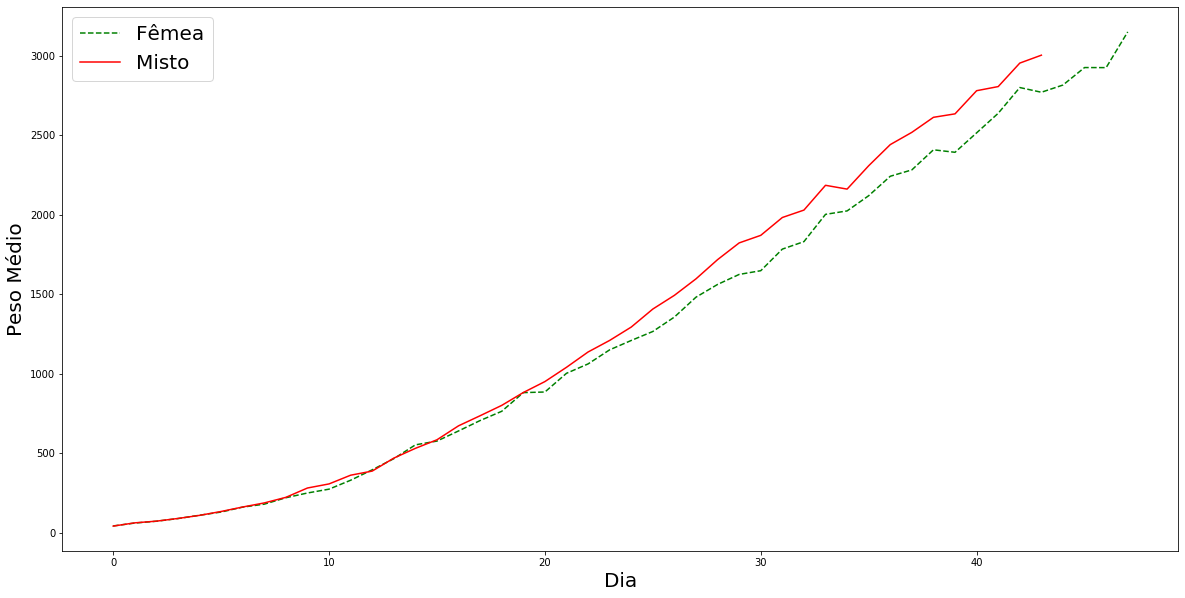

In [9]:
X = list(ag.Idade.unique())
YF = PesoFemea
YM = PesoMisto

plt.figure(figsize = (20,10))
plt.plot(X,YF,color='g',linestyle='--',label="Fêmea")
plt.plot(X, YM,color='r',label="Misto")
plt.xlabel('Dia', fontsize=20)
plt.ylabel('Peso Médio', fontsize=20)
plt.legend(fontsize=20)

### Média de umidade e temperatura do dia

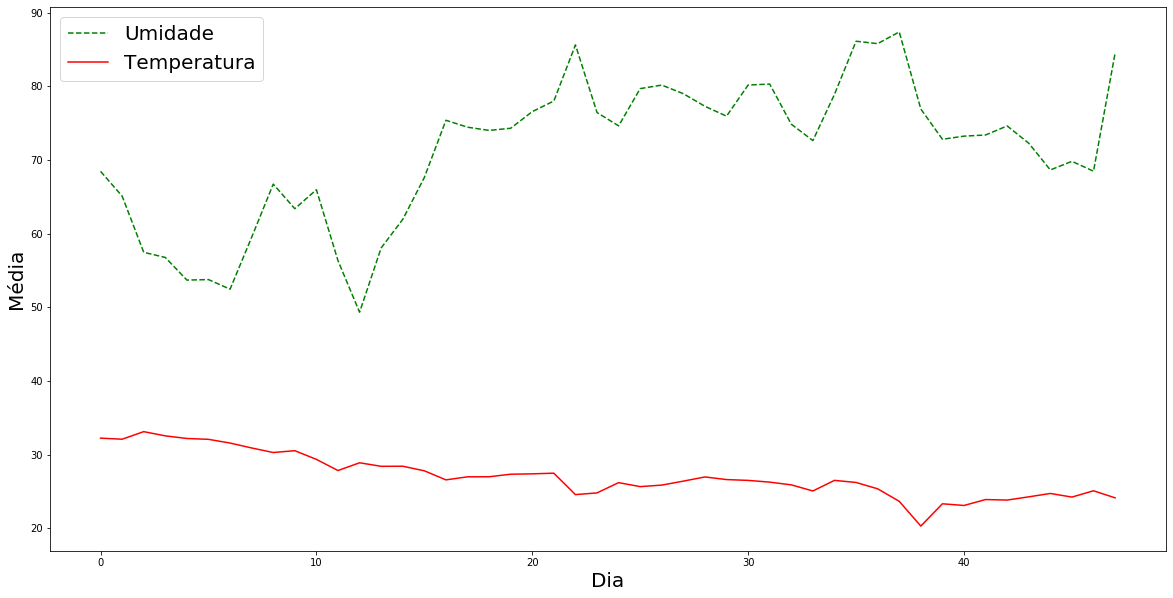

In [10]:
X = list(ag.Idade.unique())
U = Umidade
T = Temperatura

plt.figure(figsize = (20,10))
plt.plot(X,U,color='g',linestyle='--',label="Umidade")
plt.plot(X, T,color='r',label="Temperatura")
plt.xlabel('Dia', fontsize=20)
plt.ylabel('Média', fontsize=20)
plt.legend(fontsize=20)

# Análise por Linhagem

### Funções

In [11]:
# RSS e R²
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

#-----------------------------------------------

# Cálculo de RSS e R² para cada Modelo

K = 2
knn_method = "distance"
def calc_rss_r2(model_name, X_train, Y_train, X_test, Y_test):
    
    if model_name == "linear":
        reg = LinearRegression().fit(X_train,Y_train)
    elif model_name == "knn":
        reg = KNeighborsRegressor(n_neighbors=K,weights=knn_method).fit(X_train,Y_train)
    elif model_name == "tree":
        reg = DecisionTreeRegressor().fit(X_train, Y_train)
    
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
        
    rss_train = calc_rss(Y_train,pred_train)
    r2_train = calc_r2(Y_train,pred_train)
    rss_test = calc_rss(Y_test,pred_test)
    r2_test = calc_r2(Y_test,pred_test)
    
    return (rss_train, r2_train, rss_test, r2_test)

#-----------------------------------------------

# Impressão de Resultados

def print_rss_r2 (model, results):
    if model == "linear":
        print("     LINEAR REGRESSION")
    elif model == "knn":
        print("         KNN K = 2")
    elif model == "tree":
        print("         TREE")  
    print("Train\n  RSS = ",results[0],"\n  R² = ",results[1])
    print("Test\n  RSS = ",results[2],"\n  R² = ",results[3])

### Sample aleatório da base de dados

In [12]:
#ag = ag.sample(n=50000)

### Filtragem idade e linhagem

In [13]:
ag15 = ag[(ag.idLinhagem==15)&(ag.Idade>15)]
ag16 = ag[(ag.idLinhagem==16)&(ag.Idade>15)]

In [14]:
ag15.head()

Data      Peso  Umidade  Temperatura  idLote  \
724311  2019-04-22 06:40:28  550.0997     74.3         25.8       2   
724511  2019-04-22 06:46:40  798.3086     72.7         26.7       2   
724516  2019-04-22 06:46:47  521.0962     72.6         26.7       2   
724518  2019-04-22 06:46:51  558.0375     72.6         26.7       2   
724642  2019-04-22 06:50:13  594.3682     75.0         25.8       2   

        idLinhagem  idBalanca       DataAlojamento  Sexo  PesoChegada  \
724311          15    2861839  2019-04-06 06:30:00     0         38.0   
724511          15    2861839  2019-04-06 06:30:00     0         38.0   
724516          15    2861839  2019-04-06 06:30:00     0         38.0   
724518          15    2861839  2019-04-06 06:30:00     0         38.0   
724642          15    2861839  2019-04-06 06:30:00     0         38.0   

                  DataAbate  Idade  idPesoEsperado  PesoEsperado  DiffPeso  
724311  2019-05-25 09:30:00     16            1351         645.0  -94.9003  
724511  2019-05-25 09:30:00     16            1351         645.0  153.3086  
724516  2019-05-25 09:30:00     16            1351         645.0 -123.9038  
724518  2019-05-25 09:30:00     16            1351         645.0  -86.9625  
724642  2019-05-25 09:30:00     16            1351         645.0  -50.6318

In [15]:
ag16.head()

Data      Peso  Umidade  Temperatura  idLote  \
724792  2019-04-22 06:53:54  585.1373     79.0         25.9       1   
724796  2019-04-22 06:53:58  591.5339     79.1         25.8       1   
724797  2019-04-22 06:54:02  584.8327     79.1         25.8       1   
724805  2019-04-22 06:54:13  591.5339     79.4         25.8       1   
724806  2019-04-22 06:54:16  587.2695     79.5         25.9       1   

        idLinhagem  idBalanca       DataAlojamento  Sexo  PesoChegada  \
724792          16    2848352  2019-04-06 06:30:00     1         38.0   
724796          16    2848352  2019-04-06 06:30:00     1         38.0   
724797          16    2848352  2019-04-06 06:30:00     1         38.0   
724805          16    2848352  2019-04-06 06:30:00     1         38.0   
724806          16    2848352  2019-04-06 06:30:00     1         38.0   

                  DataAbate  Idade  idPesoEsperado  PesoEsperado  DiffPeso  
724792  2019-05-20 02:00:00     16            1415         654.0  -68.8627  
724796  2019-05-20 02:00:00     16            1415         654.0  -62.4661  
724797  2019-05-20 02:00:00     16            1415         654.0  -69.1673  
724805  2019-05-20 02:00:00     16            1415         654.0  -62.4661  
724806  2019-05-20 02:00:00     16            1415         654.0  -66.7305

### Linhagem 15

In [16]:
X_1 = ag15.loc[:,['Idade','Umidade']]
X_2 = ag15.loc[:,['Idade','Temperatura']]
X_3 = ag15.loc[:,['Idade','Umidade','Temperatura']]

Y = ag15.loc[:,['Peso']]
Y = Y.Peso/Y.Peso.max()

linear = LinearRegression()

In [17]:
# Idade e Umidade
print("    ** IDADE e UMIDADE **\n")
X_train, X_test, y_train, y_test = train_test_split(X_1, Y, test_size=0.15, shuffle=True)
rss_r2 = calc_rss_r2("linear", X_train, y_train, X_test, y_test)
print_rss_r2 ("linear", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("knn", X_train, y_train, X_test, y_test)
print_rss_r2 ("knn", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("tree", X_train, y_train, X_test, y_test)
print_rss_r2 ("tree", rss_r2)

    ** IDADE e UMIDADE **

     LINEAR REGRESSION
Train
  RSS =  543.8487432622134 
  R² =  0.8602865907946321
Test
  RSS =  96.90408093155428 
  R² =  0.8602314676664738
---------------------------------
         KNN K = 2
Train
  RSS =  573.1112642974067 
  R² =  0.8632071342399485
Test
  RSS =  109.17961883511546 
  R² =  0.8534698067145529
---------------------------------
         TREE
Train
  RSS =  388.1129145373906 
  R² =  0.9041303125887505
Test
  RSS =  74.01321032394905 
  R² =  0.8976205036290068


In [18]:
# Idade e Temperatura
print("    ** IDADE e TEMPERATURA **\n")
X_train, X_test, y_train, y_test = train_test_split(X_2, Y, test_size=0.15, shuffle=True)
rss_r2 = calc_rss_r2("linear", X_train, y_train, X_test, y_test)
print_rss_r2 ("linear", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("knn", X_train, y_train, X_test, y_test)
print_rss_r2 ("knn", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("tree", X_train, y_train, X_test, y_test)
print_rss_r2 ("tree", rss_r2)

    ** IDADE e TEMPERATURA **

     LINEAR REGRESSION
Train
  RSS =  544.4841914927133 
  R² =  0.8607410246317849
Test
  RSS =  96.9089096511802 
  R² =  0.8586140475662616
---------------------------------
         KNN K = 2
Train
  RSS =  614.0384513858718 
  R² =  0.8603506979353456
Test
  RSS =  111.39118445814904 
  R² =  0.8544033632592589
---------------------------------
         TREE
Train
  RSS =  413.08047609212343 
  R² =  0.897784529259229
Test
  RSS =  76.55242179743504 
  R² =  0.8914565817506469


In [19]:
# Idade, Umidade e Temperatura
print("    ** IDADE , UMIDADE e TEMPERATURA **\n")
X_train, X_test, y_train, y_test = train_test_split(X_3, Y, test_size=0.15, shuffle=True)
rss_r2 = calc_rss_r2("linear", X_train, y_train, X_test, y_test)
print_rss_r2 ("linear", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("knn", X_train, y_train, X_test, y_test)
print_rss_r2 ("knn", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("tree", X_train, y_train, X_test, y_test)
print_rss_r2 ("tree", rss_r2)

    ** IDADE , UMIDADE e TEMPERATURA **

     LINEAR REGRESSION
Train
  RSS =  545.041545836882 
  R² =  0.8604559299220146
Test
  RSS =  95.18122428500345 
  R² =  0.8614368903409866
---------------------------------
         KNN K = 2
Train
  RSS =  277.16690596630247 
  R² =  0.9360402274450162
Test
  RSS =  63.60117322735245 
  R² =  0.9161870349486148
---------------------------------
         TREE
Train
  RSS =  193.68765352403045 
  R² =  0.9545038082369827
Test
  RSS =  49.688029577311845 
  R² =  0.9334551652099874


#### Regularização - aplicando LassoCV e RidgeCV

In [20]:
alphas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso()

In [21]:
print("    ** IDADE , UMIDADE e TEMPERATURA **\n")
X_train, X_test, y_train, y_test = train_test_split(X_3, Y, test_size=0.15, shuffle=True)
reg = LinearRegression().fit(X_train,y_train)
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

results_linear = []
results_linear.append(calc_rss(y_train,pred_train))
results_linear.append(calc_r2(y_train,pred_train))
results_linear.append(calc_rss(y_test,pred_test))
results_linear.append(calc_r2(y_test,pred_test))

print_rss_r2 ("linear", results_linear)

print("\n  MSE train = ", mean_squared_error(y_train, reg.predict(X_train)))
print("  MSE test = ", mean_squared_error(y_test, reg.predict(X_test)))

print("\n---------------------------------\n")


lassocv = LassoCV(alphas = alphas)#, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

pred_train = lasso.predict(X_train)
pred_test = lasso.predict(X_test)

print("     REGURALIZAÇÃO LASSO")
results = []
results.append(calc_rss(y_train, pred_train))
results.append(calc_r2(y_train, pred_train))
results.append(calc_rss(y_test, pred_test))
results.append(calc_r2(y_test, pred_test))
print_rss_r2 ("", results)

print("\n  MSE train = ", mean_squared_error(y_train, lasso.predict(X_train)))
print("  MSE test = ", mean_squared_error(y_test, lasso.predict(X_test)))

print("\n---------------------------------\n")

print("     REGURALIZAÇÃO RIDGE")

ridge = RidgeCV(alphas = alphas)

ridge.fit(X_train, y_train) 
pred_train = ridge.predict(X_train) 
pred_test = ridge.predict(X_test)

results = []
results.append(calc_rss(y_train, pred_train))
results.append(calc_r2(y_train, pred_train))
results.append(calc_rss(y_test, pred_test))
results.append(calc_r2(y_test, pred_test))
print_rss_r2 ("", results)

print("\n  MSE train = ", mean_squared_error(y_train, ridge.predict(X_train)))
print("  MSE test = ", mean_squared_error(y_test, ridge.predict(X_test)))

    ** IDADE , UMIDADE e TEMPERATURA **

     LINEAR REGRESSION
Train
  RSS =  543.6106441206525 
  R² =  0.8608973582375548
Test
  RSS =  96.60956172508358 
  R² =  0.85881268876649

  MSE train =  0.003724712697901653
  MSE test =  0.003750953631195977

---------------------------------



/home/gykimura/miniconda3/envs/boticario/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


     REGURALIZAÇÃO LASSO
Train
  RSS =  544.1516613597453 
  R² =  0.8596445253924597
Test
  RSS =  96.70764648824697 
  R² =  0.857548386415036

  MSE train =  0.0037284196411008466
  MSE test =  0.0037547618608575464

---------------------------------

     REGURALIZAÇÃO RIDGE
Train
  RSS =  543.6106454073825 
  R² =  0.8608928672426106
Test
  RSS =  96.60952597738853 
  R² =  0.858808183355646

  MSE train =  0.0037247127067180728
  MSE test =  0.0037509522432593776


Text(0, 0.5, 'weights')

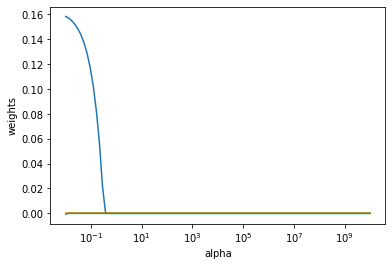

In [22]:
lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

### Linhagem 16

In [23]:
X_1 = ag16.loc[:,['Idade','Umidade']]
X_2 = ag16.loc[:,['Idade','Temperatura']]
X_3 = ag16.loc[:,['Idade','Umidade','Temperatura']]

Y = ag16.loc[:,['Peso']]
Y = Y.Peso/Y.Peso.max()

In [24]:
# Idade e Umidade
print("    ** IDADE e UMIDADE **\n")
X_train, X_test, y_train, y_test = train_test_split(X_1, Y, test_size=0.15, shuffle=True)
rss_r2 = calc_rss_r2("linear", X_train, y_train, X_test, y_test)
print_rss_r2 ("linear", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("knn", X_train, y_train, X_test, y_test)
print_rss_r2 ("knn", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("tree", X_train, y_train, X_test, y_test)
print_rss_r2 ("tree", rss_r2)

    ** IDADE e UMIDADE **

     LINEAR REGRESSION
Train
  RSS =  1024.1191648235892 
  R² =  0.8177115031726768
Test
  RSS =  180.75319497688375 
  R² =  0.8192313722478206
---------------------------------
         KNN K = 2
Train
  RSS =  1217.3328578971564 
  R² =  0.8056728308723304
Test
  RSS =  221.100158076848 
  R² =  0.8013528575951796
---------------------------------
         TREE
Train
  RSS =  814.5409762209671 
  R² =  0.8602294499543881
Test
  RSS =  150.66075339587593 
  R² =  0.8549210029218876


In [25]:
# Idade e Temperatura
print("    ** IDADE e TEMPERATURA **\n")
X_train, X_test, y_train, y_test = train_test_split(X_2, Y, test_size=0.15, shuffle=True)
rss_r2 = calc_rss_r2("linear", X_train, y_train, X_test, y_test)
print_rss_r2 ("linear", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("knn", X_train, y_train, X_test, y_test)
print_rss_r2 ("knn", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("tree", X_train, y_train, X_test, y_test)
print_rss_r2 ("tree", rss_r2)

    ** IDADE e TEMPERATURA **

     LINEAR REGRESSION
Train
  RSS =  1019.7680528567535 
  R² =  0.8190866673074093
Test
  RSS =  178.48272842069704 
  R² =  0.8198476053042498
---------------------------------
         KNN K = 2
Train
  RSS =  1199.345527784576 
  R² =  0.8082183232044822
Test
  RSS =  214.24758707404996 
  R² =  0.8047796789413504
---------------------------------
         TREE
Train
  RSS =  797.7048454689839 
  R² =  0.863845938397168
Test
  RSS =  142.0876960174927 
  R² =  0.8617929873715078


In [26]:
# Idade, Umidade e Temperatura
print("    ** IDADE , UMIDADE e TEMPERATURA **\n")
X_train, X_test, y_train, y_test = train_test_split(X_3, Y, test_size=0.15, shuffle=True)
rss_r2 = calc_rss_r2("linear", X_train, y_train, X_test, y_test)
print_rss_r2 ("linear", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("knn", X_train, y_train, X_test, y_test)
print_rss_r2 ("knn", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("tree", X_train, y_train, X_test, y_test)
print_rss_r2 ("tree", rss_r2)

    ** IDADE , UMIDADE e TEMPERATURA **

     LINEAR REGRESSION
Train
  RSS =  1017.5627486957865 
  R² =  0.8189889050593617
Test
  RSS =  180.65916718997127 
  R² =  0.8191300106310679
---------------------------------
         KNN K = 2
Train
  RSS =  502.392210989023 
  R² =  0.9217141668136964
Test
  RSS =  115.2617930262331 
  R² =  0.8988228470101347
---------------------------------
         TREE
Train
  RSS =  351.19673994924824 
  R² =  0.9441473466640085
Test
  RSS =  90.53755490586508 
  R² =  0.9192706418407252


#### Regularização - aplicando LassoCV e RidgeCV
#### Opção: loop aplicando diferentes valores alpha e verificação dos melhores RSS, R² e MSE

In [27]:
print("    ** IDADE , UMIDADE e TEMPERATURA **\n")
X_train, X_test, y_train, y_test = train_test_split(X_3, Y, test_size=0.15, shuffle=True)
reg = LinearRegression().fit(X_train,y_train)
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

results_linear = []
results_linear.append(calc_rss(y_train,pred_train))
results_linear.append(calc_r2(y_train,pred_train))
results_linear.append(calc_rss(y_test,pred_test))
results_linear.append(calc_r2(y_test,pred_test))

print_rss_r2 ("linear", results_linear)

print("\n  MSE train = ", mean_squared_error(y_train, reg.predict(X_train)))
print("  MSE test = ", mean_squared_error(y_test, reg.predict(X_test)))

print("\n---------------------------------\n")


lassocv = LassoCV(alphas = alphas)#, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

pred_train = lasso.predict(X_train)
pred_test = lasso.predict(X_test)

print("     REGURALIZAÇÃO LASSO")
results = []
results.append(calc_rss(y_train, pred_train))
results.append(calc_r2(y_train, pred_train))
results.append(calc_rss(y_test, pred_test))
results.append(calc_r2(y_test, pred_test))
print_rss_r2 ("", results)

print("\n  MSE train = ", mean_squared_error(y_train, lasso.predict(X_train)))
print("  MSE test = ", mean_squared_error(y_test, lasso.predict(X_test)))


print("\n---------------------------------\n")

print("     REGURALIZAÇÃO RIDGE")

ridge = RidgeCV(alphas = alphas)

ridge.fit(X_train, y_train) 
pred_train = ridge.predict(X_train) 
pred_test = ridge.predict(X_test)

results = []
results.append(calc_rss(y_train, pred_train))
results.append(calc_r2(y_train, pred_train))
results.append(calc_rss(y_test, pred_test))
results.append(calc_r2(y_test, pred_test))
print_rss_r2 ("", results)

print("\n  MSE train = ", mean_squared_error(y_train, ridge.predict(X_train)))
print("  MSE test = ", mean_squared_error(y_test, ridge.predict(X_test)))

    ** IDADE , UMIDADE e TEMPERATURA **

     LINEAR REGRESSION
Train
  RSS =  1018.6034852795556 
  R² =  0.8188468879195966
Test
  RSS =  179.61467528228494 
  R² =  0.8206005214382311

  MSE train =  0.00488370196037606
  MSE test =  0.0048799053245927385

---------------------------------



/home/gykimura/miniconda3/envs/boticario/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


     REGURALIZAÇÃO LASSO
Train
  RSS =  1019.3428505038676 
  R² =  0.8170093727471364
Test
  RSS =  179.81626681670954 
  R² =  0.8187079918771353

  MSE train =  0.004887246852424427
  MSE test =  0.004885382313600933

---------------------------------

     REGURALIZAÇÃO RIDGE
Train
  RSS =  1018.6034860212116 
  R² =  0.8188428699906649
Test
  RSS =  179.61468055648862 
  R² =  0.8205965328347964

  MSE train =  0.004883701963931935
  MSE test =  0.0048799054678862345
